# Hello everyone! 
**In this notebook we will analyze dataset about Smartphones features and prices. Let`s start.**

# 1) Import data and libraries.
**Firstly, import all useful libraries. Secondly, load data.**

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load data (for exploring and cleaning we load test and train datasets)
data_train = pd.read_csv("train.csv")

data_test = pd.read_csv("test.csv")

# 2) Fast looking on data
**Let`s see head of our data frames, list of columns, sizes, descriptions and nan/null values in these datasets.**

In [3]:
# fast looking (size of dataframe, columns, 5 first rows of data, info and describing)
print(f"The train dataset has {data_train.shape[0]} rows.")
print(f"And {data_train.shape[1]} columns atleast")
print('-' * 50)
print(f"The test dataset has {data_test.shape[0]} rows.")
print(f"And {data_test.shape[1]} columns.")
print('-' * 50)
print(f"List of train dataset columns: {data_train.columns}")
print('-' * 50)
print(f"List of test dataset columns: {data_test.columns}")

print("-" * 50)
data_train.info()
print('-' * 50)
data_test.info()

The train dataset has 2000 rows.
And 21 columns atleast
--------------------------------------------------
The test dataset has 1000 rows.
And 21 columns.
--------------------------------------------------
List of train dataset columns: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
--------------------------------------------------
List of test dataset columns: Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999


**Information about columns:**
* id: ID
* battery_power: Total energy a battery can store in one time (mAh)
* blue: Support bluetooth or not
* clock_speed: Speed at which microprocessor executes instructions
* dual_sim: Support dual sim or not
* fc: Front Camera mega pixels
* four_g: Support 4G or not
* int_memory: Internal Memory (GB)
* m_dep: Mobile Depth (cm)
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory (MB)
* sc_h: Screen Height of mobile (cm)
* sc_w: Screen Width of mobile (cm)
* talk_time: Time that a single battery charge will last
* three_g: Support 3G or not
* touch_screen: Has touch screen or not
* wifi: Support wifi or not

In [4]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Null and NAN values.**

In [6]:
procent_of_null = data_train.isnull().sum() / data_train.shape[0]
print(procent_of_null)
print("-" * 20)
procent_of_nan = data_train.isna().sum() / data_train.shape[0]
print(procent_of_nan)

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64
--------------------
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64


In [7]:
procent_of_null = data_test.isnull().sum() / data_test.shape[0]
print(procent_of_null)
print("-" * 20)
procent_of_nan = data_test.isna().sum() / data_test.shape[0]
print(procent_of_nan)

id               0.0
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: float64
--------------------
id               0.0
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: float64


**How we can see train dataset includes 2000 rows and 21 columns, but test dataset includes 1000 rows and 21. We can look on names of columns and understand what they mean. Also, fortunately, we can see that there are not nan and null values.**

# 3) Cleaning
**Firstly, before modelling, we have to delete unnecessary columns to prevent overfitting, but to learn which columns we should drop we must create correlation matrix (you can check my interesting notebook about correlation here: https://www.kaggle.com/artemborzenko/calculating-the-correlation-of-a-youtube-dataset).**

**Let`s create this.**  

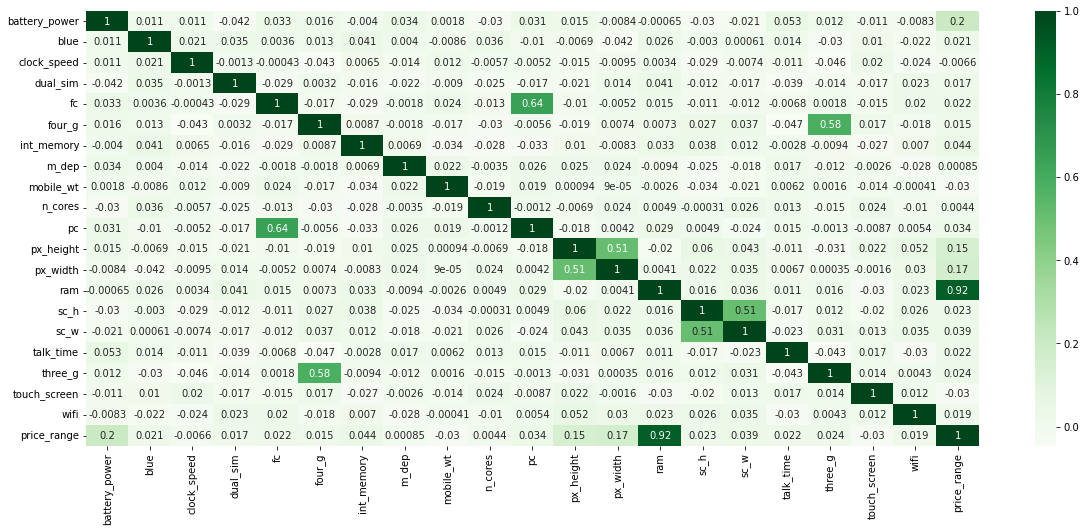

In [8]:
plt.figure(figsize=(20, 8))

correlation_rate = data_train.corr()

sns.heatmap(correlation_rate, annot = True, cmap = "Greens")

**Here we can see that there is strong positive correlation between price range and RAM. Also, price range, battery power and 4G/3G. Other features have small positive correlation, that’s why we will try work with every column.**

# 4) Exploring
**We will explore columns of TRAIN dataset about RAM, 4G/3G and Battery Power, because these columns are important for our future modeling.**

# *4.1) RAM*

In [9]:
print(f"Max RAM value is: {data_train['ram'].max()} MB")
print(f"Min RAM value is: {data_train['ram'].min()} MB")
print(f"Mean of RAM values is: {round(data_train['ram'].mean())} MB")

Max RAM value is: 3998 MB
Min RAM value is: 256 MB
Mean of RAM values is: 2124 MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'RAM value')

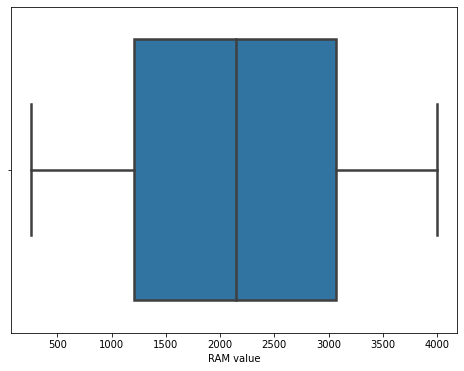

In [10]:
plt.figure(figsize=[8, 6])

sns.boxplot(data_train['ram'], linewidth=2.5)
plt.xlabel("RAM value")

In [11]:
cheap = data_train["ram"][data_train["price_range"] == 1]

medium = data_train["ram"][data_train["price_range"] == 2]

expensive = data_train["ram"][data_train["price_range"] == 3]

price_ram_data = pd.DataFrame({"Low Price" : cheap,
                              "Medium Price" : medium,
                              "High Price" : expensive})

Text(0, 0.5, 'RAM')

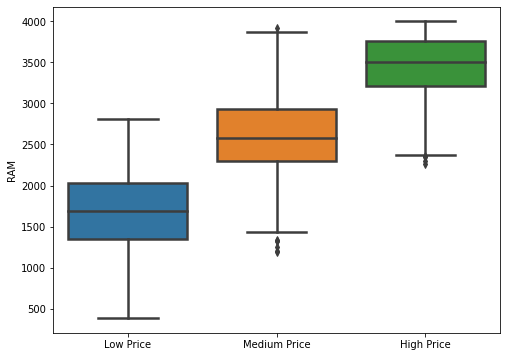

In [12]:
plt.figure(figsize=[8, 6])

sns.boxplot(data = price_ram_data, linewidth=2.5)
plt.ylabel("RAM")

**In these boxplots we can see:**

**1)	In the first graph we can see maximum, minimum, median and mean of whole RAM column.**

**2)	In the second graph we can see comparison of price ranges and RAM amount in smartphones of these ranges.**

# *4.2) Battery power*

In [13]:
print(f"Max Battery Power value is: {data_train['battery_power'].max()} mAh")
print(f"Min Battery Power value is: {data_train['battery_power'].min()} mAh")
print(f"Mean of Battery Power values is: {round(data_train['battery_power'].mean())} mAh")

Max Battery Power value is: 1998 mAh
Min Battery Power value is: 501 mAh
Mean of Battery Power values is: 1239 mAh


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Battery Power value')

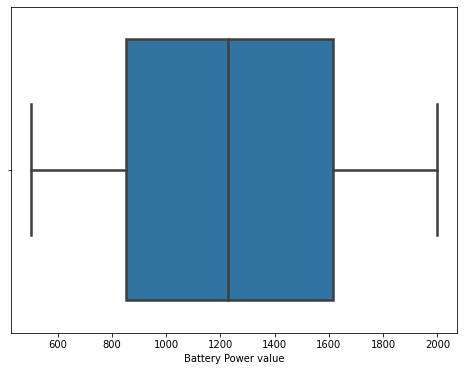

In [14]:
plt.figure(figsize=[8, 6])

sns.boxplot(data_train['battery_power'], linewidth=2.5)
plt.xlabel("Battery Power value")

In [15]:
cheap = data_train["battery_power"][data_train["price_range"] == 1]

medium = data_train["battery_power"][data_train["price_range"] == 2]

expensive = data_train["battery_power"][data_train["price_range"] == 3]

price_bp_data = pd.DataFrame({"Low Price" : cheap,
                              "Medium Price" : medium,
                              "High Price" : expensive})

Text(0, 0.5, 'RAM')

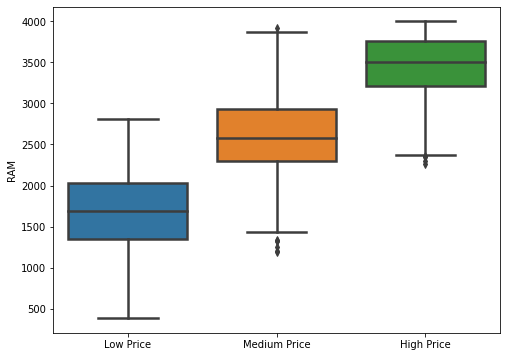

In [16]:
plt.figure(figsize=[8, 6])

sns.boxplot(data = price_ram_data, linewidth=2.5)
plt.ylabel("RAM")

**In these boxplots we can see that:**

**1)	In the first graph we can see maximum, minimum, median and mean of whole Battery Power column.**

**2)	In the second graph we can see comparison of price ranges and Battery Power amount in smartphones of these ranges. It is very interesting, because Battery Power values is almost similar in every price range.**

# *4.3) 3G/4G*

In [17]:
three_g = data_train["three_g"].value_counts().values

labels = ["3G Supported", "Not Supported"]

Text(0.5, 1.0, 'Is 3G supported?')

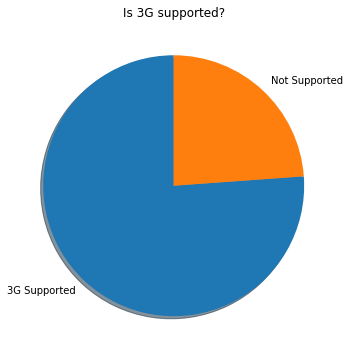

In [18]:
plt.figure(figsize=[8, 6])
plt.pie(three_g, labels = labels, shadow=True, startangle=90)
plt.title("Is 3G supported?")

In [19]:
four_g = data_train["four_g"].value_counts().values

labels = ["4G Supported", "Not Supported"]

Text(0.5, 1.0, 'Is 4G supported?')

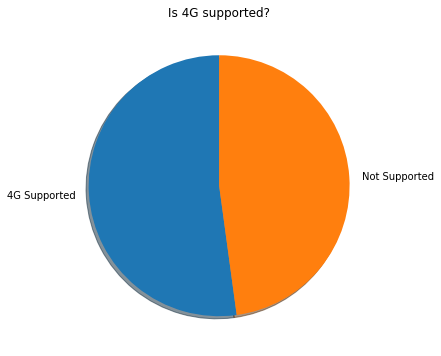

In [20]:
plt.figure(figsize=[8, 6])
plt.pie(four_g, labels = labels, shadow=True, startangle=90)
plt.title("Is 4G supported?")

**In these pie plots we can see that:**

**1)	More than a 75% of smartphones support 3G, but only 50% of smartphones support 4G.**

# 5) Modelling

**Before modelling we have to prepare data. Let’s do this:**

In [21]:
X = data_train.drop(["price_range"], axis = 1)
Y = data_train["price_range"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 25)

**Well, we can start modelling. Our task is to classify price range, that’s why we have to create classification models.**

# *Logistic Regression*

In [22]:
log_reg = LogisticRegression()

log_reg.fit(X_train, Y_train)
print(f"Score is {log_reg.score(X_test, Y_test)}")

Score is 0.64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Very bad result, continue.**

# *Decision Tree*

In [23]:
tree = DecisionTreeClassifier(max_depth = 9)

tree.fit(X_train, Y_train)
print(f"Score is {tree.score(X_test, Y_test)}")

Score is 0.84


**Not bad, but we can try with other models.**

# *Random Forest Classifier*

In [24]:
forest = RandomForestClassifier(n_estimators = 300)

forest.fit(X_train, Y_train)
print(f"Score is {forest.score(X_test, Y_test)}")

Score is 0.96


**Good result, but what about KNN?**

# *KNN*

In [25]:
knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(X_train, Y_train)
print(f"Score is {knn.score(X_test, Y_test)}")

Score is 0.96


**Great result. Let`s make a classification report.**

In [26]:
prediction = knn.predict(X_test)

print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      1.00      0.91         5
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00         4

    accuracy                           0.96        25
   macro avg       0.96      0.97      0.96        25
weighted avg       0.97      0.96      0.96        25



# 6) Conclusion.

In [27]:
prediction_price = knn.predict(data_test.drop(["id"], axis = 1))

prepared_data = data_test
prepared_data["Predicted Price"] = prediction_price

prepared_data.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predicted Price
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


**Finally, we can see new dataset with our prediction values by KNN.**

**Thank you everyone who check this notebook. If you like my notebook upvote it and if you dislike, please, write your comments. All of your feedback will help me to improve my skills.**